# a.Create a toy dataset of 2-dimensional data points


In [12]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sigma=0.1
mu1=np.array([-0.5,-0.2])
mu2=np.array([0,0.6])
mu3=np.array([0.5,0])
X1=np.random.normal(mu1,sigma,size=(30,2))
X2=np.random.normal(mu2,sigma,size=(30,2))
X3=np.random.normal(mu3,sigma,size=(30,2))
X=np.append(np.append(X1,X2,axis=0),X3,axis=0)
print(np.shape(X))

(90, 2)


# b.Apply a Kernel PCA using the RBF kernel 

In [3]:
def pca_kernel(X,sigma,n_components):
    gamma=1/(2*sigma**2)
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)
    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    return eigvals,X_pc

# c.Visualize the first 8 PCs in the 2-dimensional input space

In [39]:
x_grid = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y_grid = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)

xv, yv = np.meshgrid(x_grid, y_grid)

eigvals, X_pc = pca_kernel(X, 0.01, 8)
X_pc.shape

(90, 8)

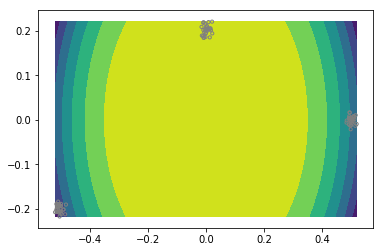

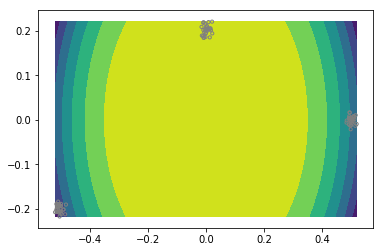

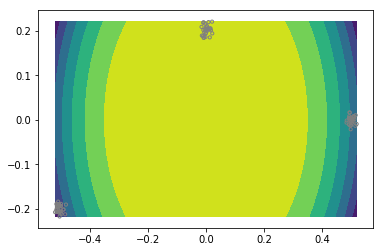

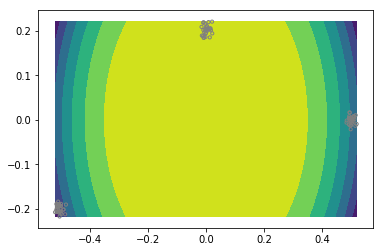

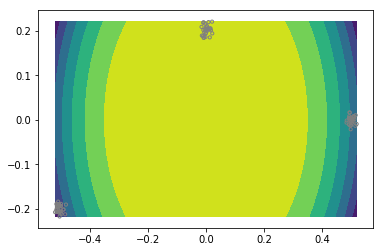

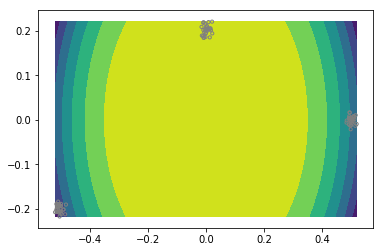

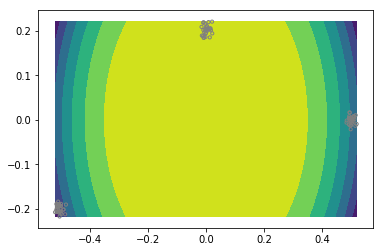

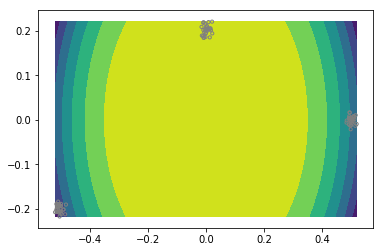

In [53]:
def project_on_pc(pc, x, y):
    print(y.shape)
    return np.dot(np.array([x, y]), pc)

vproject_on_pc = np.vectorize(project_on_pc, excluded=['pc'])

for i in np.arange(X_pc.shape[1]):
    z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)
    #z = vproject_on_pc(X_pc[], xv, yv)
    plt.figure()
    plt.contourf(x_grid,y_grid,z)
    plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='grey', s=10)